### **Install and Verify PySpark**

*  findspark is installed to help locate the PySpark installation in the environment (useful for Colab).

*   Verifies that PySpark is properly installed by printing the version.


In [1]:
!pip install findspark
!python -c "import pyspark; print(pyspark.__version__)"

3.5.1


### **2. Initialize SparkSession**

*   Starts a SparkSession named "HealthcarePlot", which is the entry point to using DataFrame API in PySpark.


In [2]:
from pyspark.sql import SparkSession


spark = SparkSession.builder.appName("HealthcarePlot").getOrCreate()

###  **3. Load the Dataset**


*   Reads the CSV file:

 * header=True tells Spark that the first row contains column names.

  * inferSchema=True makes Spark try to automatically detect column data types (e.g., Integer, String).

* df.show(5) displays the first 5 rows.

* df.printSchema() prints the structure (schema) of the dataset — column names and data types.

In [3]:
df = spark.read.csv("healthcare_dataset.csv", header=True, inferSchema=True)
df.show(5)
df.printSchema()


+-------------+---+------+----------+-----------------+-----------------+----------------+--------------------+------------------+------------------+-----------+--------------+--------------+-----------+------------+
|         Name|Age|Gender|Blood Type|Medical Condition|Date of Admission|          Doctor|            Hospital|Insurance Provider|    Billing Amount|Room Number|Admission Type|Discharge Date| Medication|Test Results|
+-------------+---+------+----------+-----------------+-----------------+----------------+--------------------+------------------+------------------+-----------+--------------+--------------+-----------+------------+
|Bobby JacksOn| 30|  Male|        B-|           Cancer|       2024-01-31|   Matthew Smith|     Sons and Miller|        Blue Cross|18856.281305978155|        328|        Urgent|    2024-02-02|Paracetamol|      Normal|
| LesLie TErRy| 62|  Male|        A+|          Obesity|       2019-08-20| Samantha Davies|             Kim Inc|          Medicare|33

### **4. Add an age_group Column**

* Adds a new column age_group to the DataFrame by:

  * Labeling people under 30 as "Under 30",

  * Between 30–49 as "30-49",

  * 50 and above as "50+".

In [4]:
from pyspark.sql.functions import when, col

df = df.withColumn("age_group",
    when(col("age") < 30, "Under 30")
    .when((col("age") >= 30) & (col("age") < 50), "30-49")
    .otherwise("50+"))


### **5. Group by Age Group and Compute Average Billing**


* Groups the data by age_group.

* Computes the average Billing Amount for each group.

* Renames the column avg(Billing Amount) → avg_charges for cleaner handling.

* Shows the grouped result.

In [5]:
grouped = df.groupBy("age_group").avg("Billing Amount")
grouped = grouped.withColumnRenamed("avg(Billing Amount)", "avg_charges")
grouped.show()


+---------+------------------+
|age_group|       avg_charges|
+---------+------------------+
|    30-49|25578.593215470202|
|      50+|25504.665046643877|
| Under 30|25578.681223382904|
+---------+------------------+



### **6. Collect Data for Plotting**

* collect() retrieves the grouped data from Spark into a local Python list.

* Extracts age_group and avg_charges values into separate lists for plotting.

In [6]:
data = grouped.collect()
age_groups = [row["age_group"] for row in data]
avg_charges = [row["avg_charges"] for row in data]


### **7. Plot the Bar Chart**

* Uses Matplotlib to create a bar chart of age groups vs. average billing charges.

* Adds labels, title, and grid for clarity.

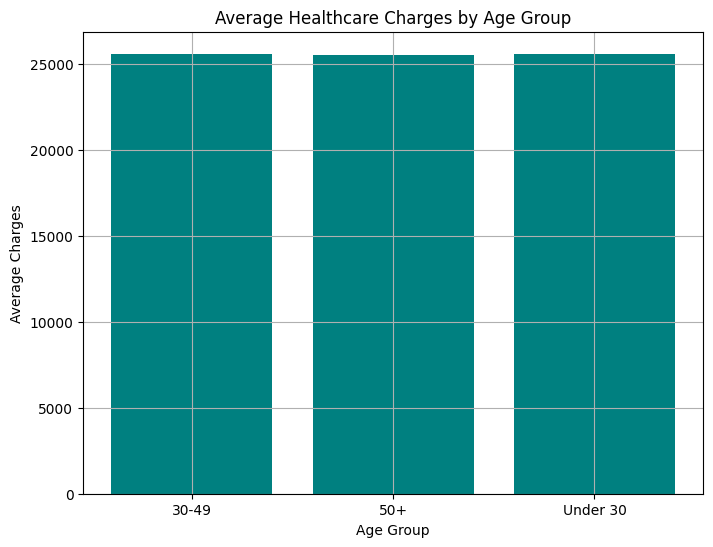

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.bar(age_groups, avg_charges, color="teal")
plt.xlabel("Age Group")
plt.ylabel("Average Charges")
plt.title("Average Healthcare Charges by Age Group")
plt.grid(True)
plt.show()
